# watch the perceptron video 

Here the discussion is about this linear function that they lecture notes associates with the perceptron
Here is a one interpretation, it might be wrong
consider logistic regression case where we want to model it with one perceptron, ignore bias
assume 2 classes:

P(Y = class2| x1, x2) = sigmoid(w1x1 + w2x2)
the decision boundry is where the decision can change
P(Y = class2| x1, x2) = 0.5 
sigmoid(w1x1 + w2x2) = 0.5
or you can say anything that satisfice the following is in class 1
sigmoid(w1x1 + w2x2) > 0.5
when you solve this you get the following equation 
w1x1 + w2x2 = 0 or x2 = -(w1/w2)x1 
you can plot this in a 2D plane, with two axis, x1 and x2
the line had a negative slope 

in case of 
sigmoid(w1x1 + w2x2) > 0.5
the equation becomes
w1x1 + w2x2 > 0  or x2 > -(w1/w2)x1 

assume w1 = w2 = 1

equation becomes => x2 = -x1   or x2 > -x1  or x1 + x2 > 0 which is points to the right side of plane x1 + x2

# Perceptron with x1, x2 heat map 
watch also the class video

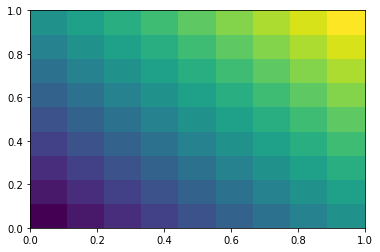

In [43]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import itertools
x1 = np.linspace(0, 1, 10)
x2 = np.linspace(0, 1, 10)
pts = itertools.product(x1, x2)
# the lower the weight the more it becomes OR , where both X1, X2 have to be large to activate sigmoid
# higher weight makes it more like AND, where as long as one of X1 and X2 is active the segmoid is active
# with negative weights you get X1 has to be high and X1 low for activation
w1 = .00010  
w2 = .00010

z = list()
x = list()
y = list()
for i, p in enumerate(pts):
    x.append(p[0])
    y.append(p[1])
    z.append(np.exp(w1*p[0] + w2*p[1])/(1 + np.exp(w1*p[0] + w2*p[1])))


x=np.array(x)
y=np.array(y)
z=np.array(z)


x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z=z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)

plt.show()

## Cross Entropy

In [44]:
import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    # more general : a sample belongs to only one class K, you want to maximize that 
    # multiply and indicator k, 1{if Y = k} with its corresponding prediction probability from model 
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

![](./images/lecture1.png)
![](./images/lecture2.png)
![](./images/lecture3.png)
![](./images/lecture4.png)

# Gradient update for a simple feed-forward network
1 neuron in this case with a 2D input

$$
y = w_1x_1 + w_2x_2
$$

$$
\hat{y} =  \sigma (w_1x_1 + w_2x_2)
$$


$$
e = y - \hat{y} =  y - \sigma (w_1x_1 + w_2x_2)
$$

$$
\frac{de^2}{dw_1} = \frac{d(y - \sigma (w_1x_1 + w_2x_2))^2}{dw_1} = \frac{de^2}{d\hat{y}}\frac{d\hat{y}}{d\sigma}\frac{d\sigma}{dw_1} = -2 (e) \sigma (1- \sigma) x_1 
$$

In [2]:
import numpy as np
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])
# Target
y = 0.2
# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# the linear combination performed by the node (h in f(h) and f'(h))
h = x[0]*weights[0] + x[1]*weights[1]
# or h = np.dot(x, weights)

# The neural network output (y-hat)
nn_output = sigmoid(h)

# output error (y - y-hat)
error = y - nn_output

# output gradient (f'(h))
output_grad = sigmoid_prime(h)

# error term (lowercase delta)
error_term = error * output_grad

# Gradient descent step 
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1]]
# or del_w = learnrate * error_term * x


In [3]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consolidated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


# Multi-Weight Update

In [5]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [7]:
import numpy as np
# from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Activation of the output unit
        #   Notice we multiply the inputs and the weights here 
        #   rather than storing h as a separate variable 
        output = sigmoid(np.dot(x, weights))

        # The error, the target minus the network output
        error = y - output

        # The error term
        #   Notice we calulate f'(h) here instead of defining a separate
        #   sigmoid_prime function. This just makes it faster because we
        #   can re-use the result of the sigmoid function stored in
        #   the output variable
        error_term = error * output * (1 - output)

        # The gradient descent step, the error times the gradient times the inputs
        del_w += error_term * x

    # Update the weights here. The learning rate times the 
    # change in weights, divided by the number of records to average
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.26276093849966364
Train loss:  0.20928619409324895
Train loss:  0.20084292908073417
Train loss:  0.1986215647552789
Train loss:  0.19779851396686018
Train loss:  0.19742577912189863
Train loss:  0.19723507746241065
Train loss:  0.19712945625092465
Train loss:  0.19706766341315077
Train loss:  0.19703005801777368
Prediction accuracy: 0.725


# Two Layer Network


In [8]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


# implementing BackPropagation

In [12]:
import numpy as np
# from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 2000
learnrate = 0.05

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


Train loss:  0.27615555613131737
Train loss:  0.25188749531892873
Train loss:  0.23865913377107018
Train loss:  0.2314109939057871
Train loss:  0.2273142944439588
Train loss:  0.22490954122608203
Train loss:  0.2234450815658325
Train loss:  0.2225237489529173
Train loss:  0.2219284620157016
Train loss:  0.2215363596614336
Prediction accuracy: 0.750
